# Decision Tree Projects 

In [1]:
#Lets import Necessary Libraries
import pandas as pd
import numpy as np

#For data Visualizatio

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Label - Outcome 

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Chech Data Summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Check null values

In [6]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#We dont have anu null values . we are good to go.

In [10]:
#Lets check Feature vs Feature Relationship. Multicollinearity problem . with heat mat

In [11]:
df=data.corr().abs()

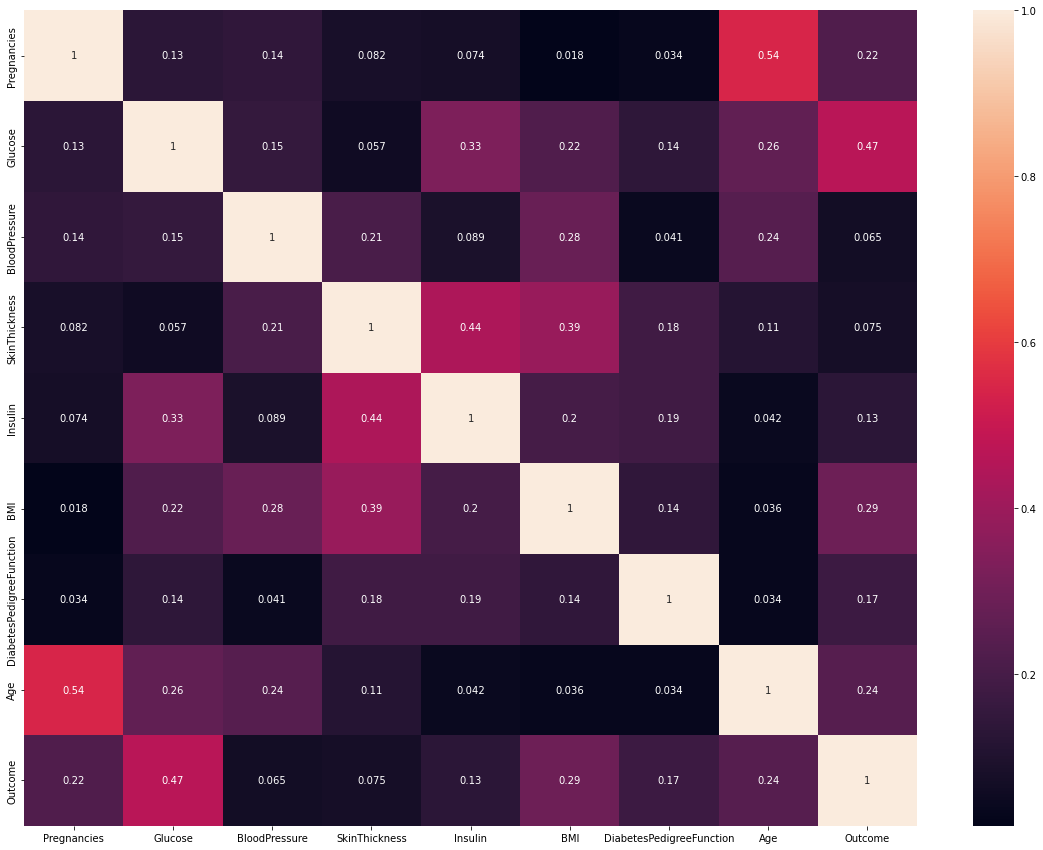

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(df,annot=True,annot_kws={'size':10})
plt.show()

In [13]:
#Okay there is multicollinearity problem . we are good to go. and all feature are important.

In [14]:
#Lets do Train Test Split 
#Import Train Test Split

In [17]:
x=data.drop(columns=['Outcome'])
y=data.Outcome

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=94255)

In [20]:
#Lets create Model with Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [32]:
def metrics_score(cnn,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=cnn.predict(x_train)
        print("===============Training Score=============")
        print("Accuracy Score====> ",accuracy_score(y_train,y_pred)*100)
    elif train==False:
        pred=cnn.predict(x_test)
        print("================Testing Score=============")
        print("Accuracy Score ",accuracy_score(y_test,pred))
        print(" Accuracy Score ",classification_report(y_test,pred))

In [33]:
#Lets Create Model

In [34]:
cnn=DecisionTreeClassifier()

In [35]:
cnn.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
from sklearn import tree

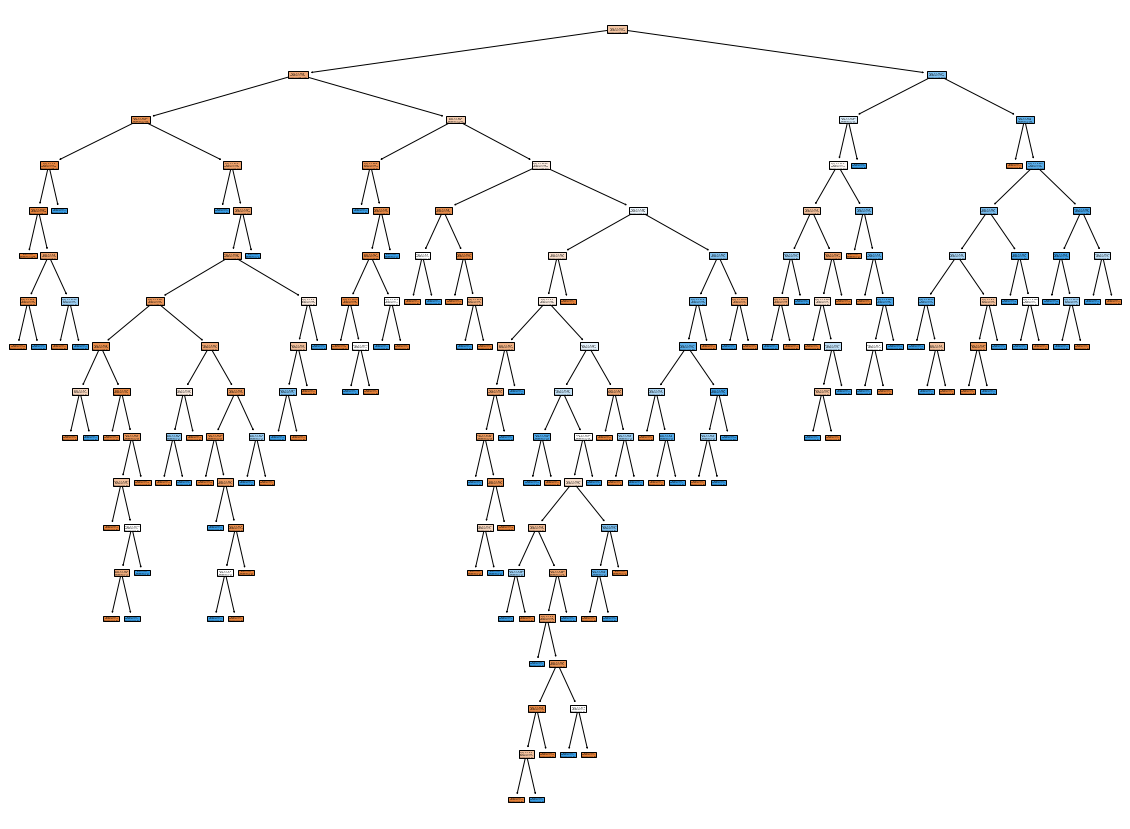

In [44]:
plt.figure(figsize=(20,15))
tree.plot_tree(cnn,filled=True)
plt.show()

In [37]:
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

===============Training Score=============
Accuracy Score====>  100.0
================Testing Score=============
Accuracy Score  0.6979166666666666
 Accuracy Score                precision    recall  f1-score   support

           0       0.78      0.75      0.76       125
           1       0.56      0.60      0.58        67

    accuracy                           0.70       192
   macro avg       0.67      0.67      0.67       192
weighted avg       0.70      0.70      0.70       192



In [39]:
#Our model is overfitted we have to tune some paramter and remove the overfitting problem .

In [40]:
from sklearn.model_selection import GridSearchCV

In [45]:
best_param={'criterion':['gini','entropy'],
           'min_samples_leaf':range(2,6),
           'min_samples_split':range(2,4),
           'max_depth':range(2,6),
           'max_leaf_nodes':range(2,8)}

In [46]:
grid_search=GridSearchCV(estimator=cnn,param_grid=best_param,cv=7,n_jobs=-1)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_leaf_nodes': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [47]:
cnn=DecisionTreeClassifier(criterion='gini',max_depth=4,max_leaf_nodes=6,min_samples_leaf=2,min_samples_split=2)


In [48]:
cnn.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6, min_samples_leaf=2)

In [49]:
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

===============Training Score=============
Accuracy Score====>  77.43055555555556
================Testing Score=============
Accuracy Score  0.7135416666666666
 Accuracy Score                precision    recall  f1-score   support

           0       0.82      0.72      0.77       125
           1       0.57      0.70      0.63        67

    accuracy                           0.71       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.73      0.71      0.72       192



In [50]:
#Lets see in decision tree

In [51]:
from sklearn import tree

In [ ]:
pyplot.savefig(fname, dpi=None, facecolor=’w’, edgecolor=’w’, orientation=’portrait’, papertype=None, format=None, transparent=False, bbox_inches=None, pad_inches=0.1, frameon=None, metadata=None)

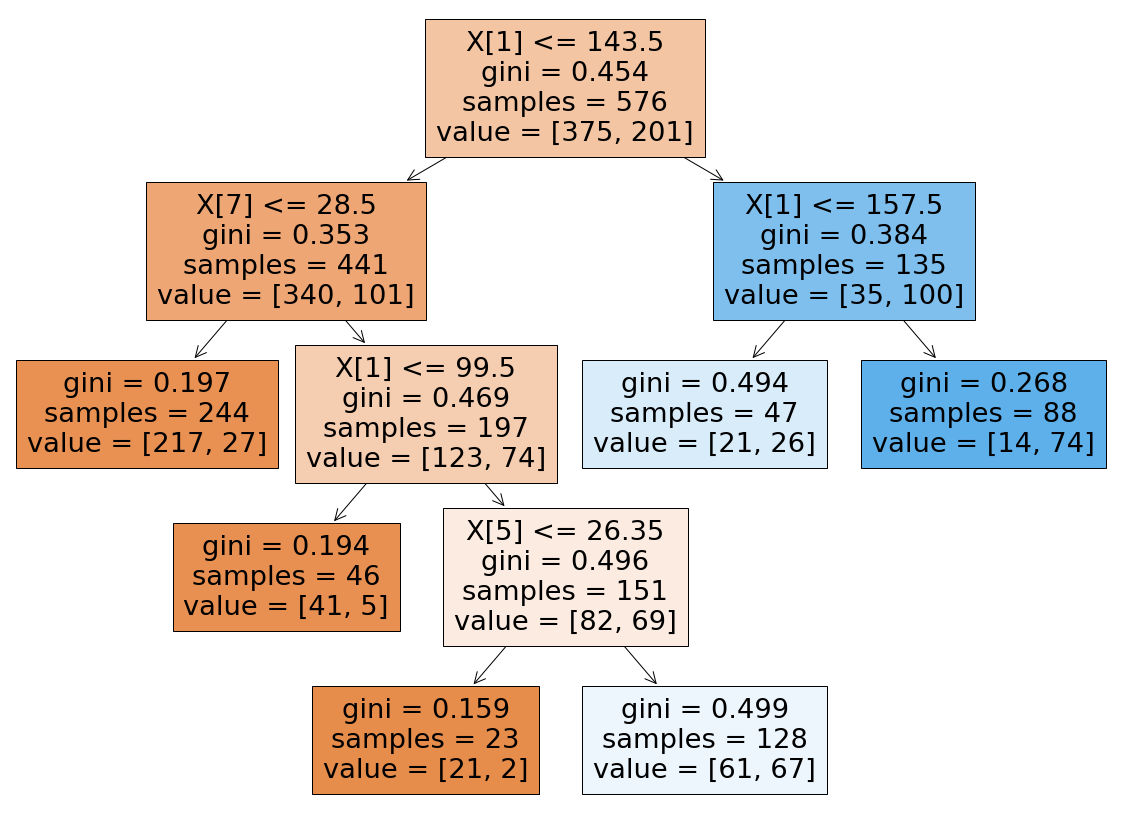

In [55]:
plt.figure(figsize=(20,15))
tree.plot_tree(cnn,filled=True)
plt.savefig('Yahsu')

In [ ]:
#Student Of DataSciece 
#Student of DataTrained - Saurav
#Date - 16-09-2022
#Time - 13:30